# Optical flow Gaussian volume denoising

In [1]:
%pip install "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"

  Cloning https://github.com/vicente-gonzalez-ruiz/denoising to /tmp/pip-install-ptwi_9ip/denoising_8bc56c407a8b4eda8a60611e9e215083
  Running command git clone --filter=blob:none --quiet https://github.com/vicente-gonzalez-ruiz/denoising /tmp/pip-install-ptwi_9ip/denoising_8bc56c407a8b4eda8a60611e9e215083
  Resolved https://github.com/vicente-gonzalez-ruiz/denoising to commit 1f0186db0b489b6917a21dbed340cb0b72fd3a40
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
use_OpenCV = True
local_debug = True

In [4]:
%pip install mrcfile

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import logging
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#from ipywidgets import *
import cv2
import time
#import kernels
import skimage
#from skimage import io as skimage_io
import mrcfile

In [8]:
import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [9]:
if local_debug:
    !ln -sf ../../information_theory/src/information_theory/ .
else:
    !pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"
import information_theory  # pip install "information_theory @ git+https://github.com/vicente-gonzalez-ruiz/information_theory"

In [10]:
if use_OpenCV:
    from denoising.volume.gaussian import Monochrome_Denoising as gaussian_denoising

In [11]:
vol_filename = "epfl1_subset1_float.mrc"

In [12]:
from collections import namedtuple
Args = namedtuple("args", ["input", "output"])
fn, fe = vol_filename.split(".")
args = Args(vol_filename , fn + "_denoised." + fe)
print(args)

args(input='epfl1_subset1_float.mrc', output='epfl1_subset1_float_denoised.mrc')


In [13]:
%pip install gdown

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock-3.20.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached soupsieve-2.8-py3-none-any.whl.metadata (4.6 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (37 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached beautifulsoup4-4.14.2-py3-none-any.whl (106 kB)
Using cached soupsieve-2.8-py3

In [16]:
%%bash -s "$args.input"
set -x
OUTPUT_FILENAME=$1
#rm -f $OUTPUT_FILENAME
if test ! -f $OUTPUT_FILENAME ; then
    FILEID="1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB" # https://drive.google.com/file/d/1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB/view?usp=sharing
    #FILEID="1MZ05sO6lLDEvZRwSEzhSmm3kbaIuhvlq" # https://drive.google.com/file/d/1MZ05sO6lLDEvZRwSEzhSmm3kbaIuhvlq/view?usp=drive_link
    #FILEID="1iui018SGKa5nb0ybeoUAB7uCUhl9EJ5o" #https://drive.google.com/file/d/1iui018SGKa5nb0ybeoUAB7uCUhl9EJ5o/view?usp=sharing
    #wget --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O $OUTPUT_FILENAME #2> /dev/null
    #wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=FILEID" -O FILENAME && rm -rf /tmp/cookies.txt
    ~/envs/SPGD/bin/gdown https://drive.google.com/uc?id=$FILEID # pip install gdown
fi
ls -l $OUTPUT_FILENAME
set +x

+ OUTPUT_FILENAME=epfl1_subset1_float.mrc
+ test '!' -f epfl1_subset1_float.mrc
+ FILEID=1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB
+ /home/jupyter-vruiz/envs/SPGD/bin/gdown 'https://drive.google.com/uc?id=1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB'
Downloading...
From (original): https://drive.google.com/uc?id=1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB
From (redirected): https://drive.google.com/uc?id=1qe7d9dOJg1H3xlGy1DIgEdAnwuAgA1iB&confirm=t&uuid=4f584933-ff85-4730-8b03-016572f82fcb
To: /nas/vruiz/repos/denoising/SPGD/epfl1_subset1_float.mrc
100%|██████████| 472M/472M [00:14<00:00, 33.1MB/s] 
+ ls -l epfl1_subset1_float.mrc


-rw-r----- 1 jupyter-vruiz jupyter-vruiz 471860224 jun 28 16:09 epfl1_subset1_float.mrc


+ set +x


In [17]:
#noisy = skimage.io.imread(args.input, plugin="tifffile").astype(np.float32)
stack_MRC = mrcfile.open(args.input)
noisy = stack_MRC.data

In [18]:
Z_dim = noisy.shape[0]
Z2 = Z_dim//2

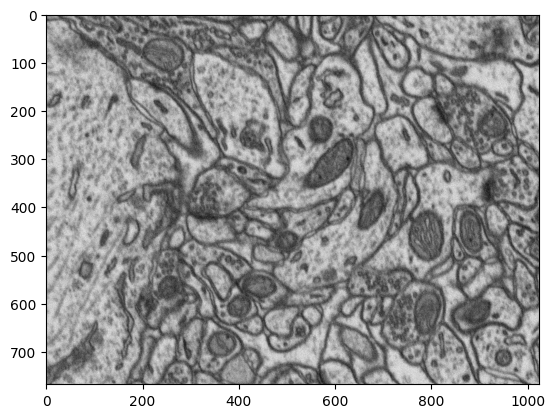

In [19]:
plt.imshow(noisy[Z2], cmap="gray")

In [20]:
def get_gaussian_kernel(sigma=1):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2 :
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

std_dev = 2.0
sigma = np.array([std_dev, std_dev, std_dev])
kernel = [None]*3
kernel[0] = get_gaussian_kernel(sigma[0])
kernel[1] = get_gaussian_kernel(sigma[1])
kernel[2] = get_gaussian_kernel(sigma[2])

In [21]:
denoiser = gaussian_denoising(logger)
denoised = denoiser.filter(noisy, kernel)

[gaussian.py:99 filter()] mean=140.0274200439453
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


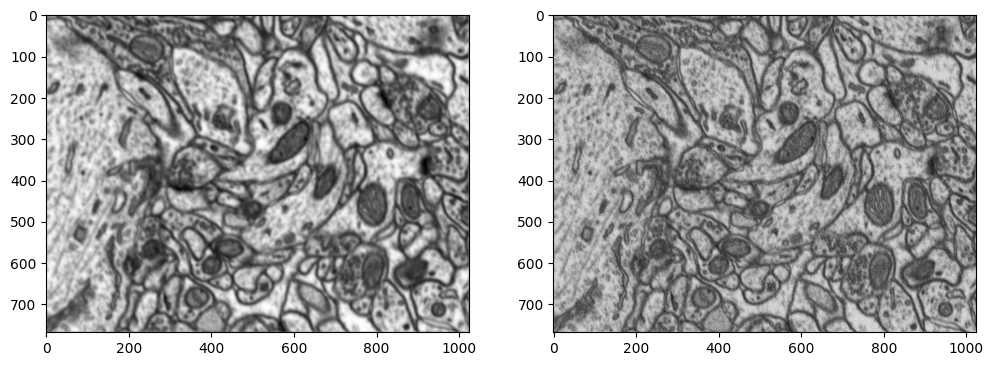

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[Z2], cmap="gray")
axes[1].imshow(noisy[Z2], cmap="gray")
plt.show()

In [23]:
if use_OpenCV:
    from denoising.volume.OF_gaussian import Monochrome_Denoising as OF_gaussian_denoising

In [ ]:
denoiser = OF_gaussian_denoising(logger)
denoised = denoiser.filter(noisy, kernel, l=2, w=5)

[OF_gaussian.py:23 __init__()] logger: <Logger __main__ (INFO)>
[OF_gaussian.py:23 __init__()] pyramid_levels: 1
[OF_gaussian.py:23 __init__()] window_side: 5
[OF_gaussian.py:23 __init__()] sigma_poly: 1.0
[OF_gaussian.py:23 __init__()] num_iters: 3
[OF_gaussian.py:23 __init__()] N_poly: 5
[gaussian.py:99 filter()] mean=140.0274200439453


In [ ]:
figure(figsize=(32, 32))
plt.subplot(1, 3, 1)
plt.title("original")
slice_idx = noisy.shape[0]//2
imgplot = plt.imshow(noisy[slice_idx][::-1, :], cmap="gray")
plt.subplot(1, 3, 2)
title = f"OF Gaussian $\\sigma={std_dev}$"
plt.title(title)
plt.imshow(denoised[slice_idx][::-1, :], cmap="gray")
plt.subplot(1, 3, 3)
plt.title("difference")
plt.imshow(noisy[slice_idx][::-1, :] - denoised[slice_idx][::-1, :], cmap="gray")
plt.show()

In [ ]:
fig_single, ax_single = plt.subplots(figsize=(10, 10))
ax_single.imshow(denoised[slice_idx][::-1, :], cmap="gray")
ax_single.set_title(title)
fig_single.savefig(title + ".png")
plt.close(fig_single)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
slice_idx = noisy.shape[1]//2
axs[0].imshow(noisy[:, slice_idx], cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised[:, slice_idx], cmap="gray")
axs[1].set_title(f"Denoised")
fig.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 32))
slice_idx = noisy.shape[2]//2
axs[0].imshow(noisy[:, :, slice_idx], cmap="gray")
axs[0].set_title(f"Noisy")
axs[1].imshow(denoised[:, :, slice_idx], cmap="gray")
axs[1].set_title(f"Denoised")
fig.tight_layout()
plt.show()

In [ ]:
with mrcfile.new(f"{fn}_{title}.mrc", overwrite=True) as mrc:
            mrc.set_data(denoised.astype(np.float32))
            mrc.data

In [ ]:
f"{fn}_{title}.mrc"

In [ ]:
input()

In [ ]:
GT = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [ ]:
padded_GT = np.zeros(shape=(GT.shape[0]+32, GT.shape[1]+32), dtype=np.uint8)
padded_GT[16:-16, 16:-16] = GT
GT = padded_GT

In [ ]:
w = 7
Z = 32

In [ ]:
mean = 0
var = 1000
sigma = 20 #var**0.5
noise = np.random.normal(mean, sigma, GT.shape).reshape(GT.shape)
noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
noisy = np.array([noisy]*Z)

In [ ]:
Z2 = Z//2

In [ ]:
plt.imshow(noisy[Z2], cmap="gray")

In [ ]:
skimage.io.imsave(arr=noisy, fname="noisy.tif", plugin="tifffile")

In [ ]:
plt.imshow(noisy[:, :, 256], cmap="gray")

In [ ]:
sigma = np.array([1.5, 1.5, 1.5])
kernel = [None]*3
kernel[0] = get_gaussian_kernel(sigma[0])
kernel[1] = get_gaussian_kernel(sigma[1])
kernel[2] = get_gaussian_kernel(sigma[2])
for i in range(3):
    print(len(kernel[i]))

In [ ]:
denoised = denoiser.filter(noisy, kernel, l=1, w=5)

In [ ]:
plt.imshow(denoised[:, :, 256], cmap="gray")

In [ ]:
sum_denoised = np.zeros_like(denoised[0])
for z in range(0, Z):
    sum_denoised += denoised[z]
    plt.imshow(denoised[z], cmap="gray")
    plt.show()
avg_denoised = sum_denoised / Z

In [ ]:
print(f"{information_theory.distortion.PSNR(denoised[Z2], GT):4.2f} dB")

In [ ]:
print(f"{information_theory.distortion.PSNR(noisy[Z2], GT):4.2f} dB")

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(GT, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy[Z2], cmap="gray")
axs[1].set_title(f"Noisy ({information_theory.distortion.PSNR(noisy[Z2], GT):4.2f} dB)")
axs[2].imshow(avg_denoised, cmap="gray")
#axs[2].set_title(f"Denoised ({information_theory.distortion.PSNR(avg_denoised, GT):4.2f} dB)")
axs[2].set_title(f"Denoised ({information_theory.distortion.PSNR(denoised[Z2], GT):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].imshow(avg_denoised, cmap="gray")
#axes[1].imshow(noisy[0], cmap="gray")
axes[1].imshow(denoised[Z2], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
if local_debug:
    !ln -sf ../../motion_estimation/src/motion_estimation/ .
else:
    !pip install "motion_estimation @ git+https://github.com/vicente-gonzalez-ruiz/motion_estimation"
if use_OpenCV:
    from motion_estimation._2D.farneback_OpenCV import Estimator_in_CPU as Estimator
else:
    from motion_estimation._2D.farneback_python import Estimator
from motion_estimation._2D.project import project

In [ ]:
from numpy.linalg import LinAlgError

In [ ]:
noisy = skimage.io.imread("small_vol.tif", plugin="tifffile").astype(np.float32)

In [ ]:
N = 32
N2 = N//2
plt.imshow(noisy[N2], cmap="gray")

In [ ]:
def get_gaussian_kernel(sigma=1):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2 :
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

OFCA_EXTENSION_MODE = cv2.BORDER_REPLICATE
OF_LEVELS = 0
OF_WINDOW_SIZE = 5
OF_ITERS = 3
OF_POLY_N = 5
OF_POLY_SIGMA = 0.5 #1.2
SIGMA = 2.0

def warp_slice(reference, flow):
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    warped_slice = cv2.remap(reference, map_xy, None, interpolation=cv2.INTER_LINEAR, borderMode=OFCA_EXTENSION_MODE)
    return warped_slice

def get_flow(reference, target, l=OF_LEVELS, w=OF_WINDOW_SIZE, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow, pyr_scale=0.5, levels=l, winsize=w, iterations=OF_ITERS, poly_n=OF_POLY_N, poly_sigma=OF_POLY_SIGMA, flags=cv2.OPTFLOW_USE_INITIAL_FLOW)
    return flow

def _get_flow(reference, target, l=OF_LEVELS, w=OF_WINDOW_SIZE, prev_flow=None):
    flow = cv2.calcOpticalFlowFarneback(prev=target, next=reference, flow=prev_flow, pyr_scale=0.5, levels=l, winsize=w, iterations=OF_ITERS, poly_n=OF_POLY_N, poly_sigma=OF_POLY_SIGMA, flags=0)
    return flow

def OF_filter_along_Z(vol, kernel, l, w, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0] + kernel.size, shape_of_vol[1], shape_of_vol[2]), fill_value=mean)
    padded_vol[kernel.size//2:shape_of_vol[0] + kernel.size//2, :, :] = vol
    Z_dim = vol.shape[0]
    for z in range(Z_dim):
        tmp_slice = np.zeros_like(vol[z]).astype(np.float32)
        assert kernel.size % 2 != 0 # kernel.size must be odd
        prev_flow = np.zeros(shape=(shape_of_vol[1], shape_of_vol[2], 2), dtype=np.float32)
        for i in range((kernel.size//2) - 1, -1, -1):
            flow = get_flow(padded_vol[z + i, :, :], vol[z, :, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[z + i, :, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        tmp_slice += vol[z, :, :] * kernel[kernel.size//2]
        prev_flow = np.zeros(shape=(shape_of_vol[1], shape_of_vol[2], 2), dtype=np.float32)
        for i in range(kernel.size//2+1, kernel.size):
            flow = get_flow(padded_vol[z + i, :, :], vol[z, :, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[z + i, :, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        filtered_vol[z, :, :] = tmp_slice
    return filtered_vol

def no_OF_filter_along_Z(vol, kernel, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0] + kernel.size, shape_of_vol[1], shape_of_vol[2]), fill_value=mean)
    padded_vol[kernel.size//2:shape_of_vol[0] + kernel.size//2, ...] = vol
    Z_dim = vol.shape[0]
    for z in range(Z_dim):
        tmp_slice = np.zeros_like(vol[z, :, :]).astype(np.float32)
        for i in range(kernel.size):
            tmp_slice += padded_vol[z + i, :, :] * kernel[i]
        filtered_vol[z, :, :] = tmp_slice
    return filtered_vol

def OF_filter_along_Y(vol, kernel, l, w, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1] + kernel.size, shape_of_vol[2]), fill_value=mean)
    padded_vol[:, kernel.size//2:shape_of_vol[1] + kernel.size//2, :] = vol
    Y_dim = vol.shape[1]
    for y in range(Y_dim):
        tmp_slice = np.zeros_like(vol[:, y, :]).astype(np.float32)
        assert kernel.size % 2 != 0 # kernel.size must be odd
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[2], 2), dtype=np.float32)
        for i in range((kernel.size//2) - 1, -1, -1):
            flow = get_flow(padded_vol[:, y + i, :], vol[:, y, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow                     
            OF_compensated_slice = warp_slice(padded_vol[:, y + i, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        tmp_slice += vol[:, y, :] * kernel[kernel.size//2]
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[2], 2), dtype=np.float32)
        for i in range(kernel.size//2+1, kernel.size):
            flow = get_flow(padded_vol[:, y + i, :], vol[:, y, :], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow                      
            OF_compensated_slice = warp_slice(padded_vol[:, y + i, :], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        filtered_vol[:, y, :] = tmp_slice
    return filtered_vol

def no_OF_filter_along_Y(vol, kernel, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1] + kernel.size, shape_of_vol[2]), fill_value=mean)
    padded_vol[:, kernel.size//2:shape_of_vol[1] + kernel.size//2, :] = vol
    Y_dim = vol.shape[1]
    for y in range(Y_dim):
        tmp_slice = np.zeros_like(vol[:, y, :]).astype(np.float32)
        for i in range(kernel.size):
            tmp_slice += padded_vol[:, y + i, :] * kernel[i]
        filtered_vol[:, y, :] = tmp_slice
    return filtered_vol

def OF_filter_along_X(vol, kernel, l, w, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1], shape_of_vol[2] + kernel.size), fill_value=mean)
    padded_vol[:, :, kernel.size//2:shape_of_vol[2] + kernel.size//2] = vol
    X_dim = vol.shape[2]
    for x in range(X_dim):
        tmp_slice = np.zeros_like(vol[:, :, x]).astype(np.float32)
        assert kernel.size % 2 != 0 # kernel.size must be odd
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[1], 2), dtype=np.float32)
        for i in range((kernel.size//2) - 1, -1, -1):
            flow = get_flow(padded_vol[:, :, x + i], vol[:, :, x], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[:, :, x + i], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        tmp_slice += vol[:, :, x] * kernel[kernel.size//2]
        prev_flow = np.zeros(shape=(shape_of_vol[0], shape_of_vol[1], 2), dtype=np.float32)
        for i in range(kernel.size//2+1, kernel.size):
            flow = get_flow(padded_vol[:, :, x + i], vol[:, :, x], l, w, prev_flow)
            print(np.average(np.abs(flow)), end=' ')
            prev_flow = flow
            OF_compensated_slice = warp_slice(padded_vol[:, :, x + i], flow)
            tmp_slice += OF_compensated_slice * kernel[i]
        filtered_vol[:, :, x] = tmp_slice
    return filtered_vol

def no_OF_filter_along_X(vol, kernel, mean):
    filtered_vol = np.zeros_like(vol).astype(np.float32)
    shape_of_vol = np.shape(vol)
    padded_vol = np.full(shape=(shape_of_vol[0], shape_of_vol[1], shape_of_vol[2] + kernel.size), fill_value=mean)
    padded_vol[:, :, kernel.size//2:shape_of_vol[2] + kernel.size//2] = vol
    X_dim = vol.shape[2]
    for x in range(X_dim):
        tmp_slice = np.zeros_like(vol[:, :, x]).astype(np.float32)
        for i in range(kernel.size):
            tmp_slice += padded_vol[:, :, x + i] * kernel[i]
        filtered_vol[:, :, x] = tmp_slice
    return filtered_vol

def OF_filter(vol, kernel, l, w):
    mean = vol.mean()
    print("\nZ")
    print(vol.dtype)
    print(f"max(vol) = {np.max(vol)}")
    print(f"min(vol) = {np.min(vol)}")
    print(f"avg(vol) = {np.average(vol)}")
    filtered_vol_Z = OF_filter_along_Z(vol, kernel[0], l, w, mean)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(vol[8].astype(np.float32), cmap="gray")
    axes[1].imshow(vol[8] - filtered_vol_Z[8], cmap="gray")
    plt.show()
    print(f"max(vol) = {np.max(vol)}")
    print(f"min(vol) = {np.min(vol)}")
    print(f"avg(vol) = {np.average(vol)}")
    print(f"max(filtered_vol_Z) = {np.max(filtered_vol_Z)}")
    print(f"min(filtered_vol_Z) = {np.min(filtered_vol_Z)}")
    print(f"avg(filtered_vol_Z) = {np.average(filtered_vol_Z)}")
    #filtered_vol_Z[...] = vol
    #print(filtered_vol_Z.dtype)
    #return filtered_vol_Z
    print("\nY")
    filtered_vol_ZY = OF_filter_along_Y(filtered_vol_Z, kernel[1], l, w, mean)
    #filtered_vol_ZY = OF_filter_along_Y(vol.astype(np.float32), kernel[1], l, w, mean)
    print("\nX")
    filtered_vol_ZYX = OF_filter_along_X(filtered_vol_ZY, kernel[2], l, w, mean)
    return filtered_vol_ZYX

def no_OF_filter(vol, kernel):
    mean = vol.mean()
    filtered_vol_Z = no_OF_filter_along_Z(vol, kernel[0], mean)
    filtered_vol_ZY = no_OF_filter_along_Y(filtered_vol_Z, kernel[1], mean)
    filtered_vol_ZYX = no_OF_filter_along_X(filtered_vol_ZY, kernel[2], mean)
    return filtered_vol_ZYX

In [ ]:
sigma = np.array([2.0, 2.0, 2.0])
kernel = [None]*3
kernel[0] = get_gaussian_kernel(sigma[0])
kernel[1] = get_gaussian_kernel(sigma[1])
kernel[2] = get_gaussian_kernel(sigma[2])

In [ ]:
denoised = no_OF_filter(noisy, kernel)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[16], cmap="gray")
axes[1].imshow(noisy[16], cmap="gray")
plt.show()

In [ ]:
denoised = OF_filter(noisy, kernel, 1, 5)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[N2], cmap="gray")
axes[1].imshow(noisy[N2], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
from skimage import io as skimage_io
GT = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/barb.png")

In [ ]:
mean = 0
var = 1000
sigma = 20 #var**0.5
noise = np.random.normal(mean, sigma, GT.shape).reshape(GT.shape)
noisy = np.clip(a=GT.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
N = 16
N2 = N//2
noisy = np.array([noisy]*N)

In [ ]:
noisy.shape

In [ ]:
plt.imshow(noisy[N2], cmap="gray")

In [ ]:
plt.imshow(noisy[:, :, 256], cmap="gray")

In [ ]:
denoised = OF_filter(noisy, kernel, 1, 5)

In [ ]:
plt.imshow(denoised[:, :, 256], cmap="gray")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].imshow(denoised[1], cmap="gray")
axes[1].imshow(noisy[N2], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
def get_kernel(sigma=1.5):
    number_of_coeffs = 3
    number_of_zeros = 0
    while number_of_zeros < 2:
        delta = np.zeros(number_of_coeffs)
        delta[delta.size//2] = 1
        coeffs = scipy.ndimage.gaussian_filter1d(delta, sigma=sigma)
        number_of_zeros = coeffs.size - np.count_nonzero(coeffs)
        number_of_coeffs += 1
    return coeffs[1:-1]

In [ ]:
def filter_Z(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0] + KL, vol.shape[1], vol.shape[2]))
    extended_vol[KL2:vol.shape[0] + KL2, :, :] = vol[:, :, :]
    filtered_vol = np.empty_like(vol, dtype=np.float32)
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    filtered_YX_plane = np.empty(shape=(Y_dim, X_dim), dtype=np.float32)
    for z in range(Z_dim):
        print(z, end=' ')
        #vertical_line = np.zeros(N_rows, dtype=np.float32)
        filtered_YX_plane.fill(0)
        for i in range(KL2 - 1, -1, -1):
            warped_plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            filtered_YX_plane += warped_plane * kernel[i]
        filtered_YX_plane += warped_plane * kernel[KL2]
        for i in range(KL2 + 1, KL):
            warped_plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            filtered_YX_plane += warped_plane * kernel[i]     
        filtered_vol[z, :, :] = filtered_YX_plane[:, :]
    return filtered_vol
        
def _filter_Z(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0] + KL, vol.shape[1], vol.shape[2]))
    extended_vol[KL2:vol.shape[0] + KL2, ...] = vol[...]
    filtered_vol = []
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    for z in range(Z_dim):
        YX_plane = np.zeros(shape=(Y_dim, X_dim), dtype=np.float32)
        for i in range(KL2 - 1, -1, -1):
            plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            YX_plane += plane * kernel[i]
        YX_plane += plane * kernel[KL2]
        for i in range(KL2 + 1, KL):
            plane = project_A_to_B(A=extended_vol[z + i, ...], B=extended_vol[z, ...])
            YX_plane += plane * kernel[i]            
        filtered_vol.append(YX_plane)
    filtered_vol = np.stack(filtered_vol, axis=0)
    return filtered_vol

def filter_Y(vol, kernel, mean):
    vol = np.transpose(vol, (1, 0, 2))
    filtered_vol = filter_Z(vol, kernel, mean)
    filtered_vol = np.transpose(filtered_vol, (1, 0, 2))
    return filtered_vol

def _filter_Y(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0], vol.shape[1] + KL, vol.shape[2]))
    extended_vol[:, KL2:vol.shape[1] + KL2, :] = vol[...]
    filtered_vol = []
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    for y in range(Y_dim):
        ZX_plane = np.zeros(shape=(Z_dim, X_dim), dtype=np.float32)
        for i in range(KL):
            plane = project_A_to_B(A=extended_vol[:, y + i, :], B=extended_vol[:, y, :])
            ZX_plane += plane * kernel[i]
        filtered_vol.append(ZX_plane)
    filtered_vol = np.stack(filtered_vol, axis=1)
    return filtered_vol

def filter_X(vol, kernel, mean):
    vol = np.transpose(vol, (2, 1, 0))
    filtered_vol = filter_Z(vol, kernel, mean)
    filtered_vol = np.transpose(filtered_vol, (2, 1, 0))
    return filtered_vol

def _filter_X(vol, kernel, mean):
    KL = kernel.size
    KL2 = KL//2
    extended_vol = np.full(fill_value=mean, shape=(vol.shape[0], vol.shape[1], vol.shape[2] + KL))
    extended_vol[..., KL2:vol.shape[2] + KL2] = vol[...]
    filtered_vol = []
    Z_dim = vol.shape[0]
    Y_dim = vol.shape[1]
    X_dim = vol.shape[2]
    for x in range(X_dim):
        ZY_plane = np.zeros(shape=(Z_dim, Y_dim), dtype=np.float32)
        for i in range(KL):
            plane = project_A_to_B(A=extended_vol[..., x + i], B=extended_vol[..., x])
            ZY_plane += plane * kernel[i]
        filtered_vol.append(ZY_plane)
    filtered_vol = np.stack(filtered_vol, axis=2)
    return filtered_vol

def filter(vol, kernel, mean):
    vol_z = filter_Z(vol, kernel, mean)
    vol_y = filter_Y(vol_z, kernel, mean)
    vol_x = filter_X(vol_y, kernel, mean)
    return vol_x

In [ ]:
def project_A_to_B(A, B):
    return A

In [ ]:
kernel = get_kernel(2.5)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [ ]:
denoised = filter(noisy, kernel, mean=128)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[N2], cmap="gray")
axes[1].imshow(noisy[N2], cmap="gray")
plt.show()

In [ ]:
def project(logger,
            image,
            flow,
            interpolation_mode=cv2.INTER_LINEAR,
            extension_mode=cv2.BORDER_REPLICATE):
    
    logger.info(f"image.shape={image.shape}")
    
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')
    projection = cv2.remap(
        image,
        map_xy,
        None,
        interpolation=interpolation_mode,
        borderMode=extension_mode)
    
    return projection

In [ ]:
def get_flow(
        reference,
        target,
        l=3,
        w=5,
        prev_flow=None):
    if __debug__:
        time_0 = time.perf_counter()
    flow = cv2.calcOpticalFlowFarneback(
        prev=target,
        next=reference,
        flow=None,
        pyr_scale=0.5,
        levels=l,
        winsize=w,
        iterations=3,
        poly_n=5,
        poly_sigma=1.1,
        flags=0)
    if __debug__:
        time_1 = time.perf_counter()
        logging.debug(f"OF computed in {1000*(time_1 - time_0):4.3f} ms, \
max_X={np.max(flow[0]):+3.2f}, min_X={np.min(flow[0]):+3.2f}, \
max_Y={np.max(flow[1]):+3.2f}, min_Y={np.min(flow[1]):+3.2f}")
    return flow

In [ ]:
estimator = Estimator(logger, pyr_levels=3, sigma_poly=0.5, win_side=5, num_iters=3, flags=0)

def project_A_to_B(A, B):
    try:
        flow = get_flow(target=B, reference=A, prev_flow=None)
    except LinAlgError as e:
        print(f"Caught exception: {e}")
        self.counter += 1
        return A
    projection = project(logger, image=A.astype(np.uint8), flow=flow)
    return projection

In [ ]:
denoised = filter(noisy, kernel, mean=128)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(denoised[16], cmap="gray")
axes[1].imshow(noisy[16], cmap="gray")
plt.show()

In [ ]:
input()

In [ ]:
import denoising.image.OF_gaussian as denoising

In [ ]:
if use_OpenCV:
    denoiser = gaussian_denoising.Monochrome_Image_OF_Gaussian_Denoising(sigma_gaussian=sigma_gaussian, l=3, w=5, sigma_OF=1.0, verbosity=logging.DEBUG)
else:
    denoiser = denoising.Monochrome_Denoising(logger, pyr_levels=2, win_side=27, num_iters=3, sigma_poly=4.0)

In [ ]:
kernel = denoiser.get_kernel(1.5)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [ ]:
denoised = filter(vol, kernel)

In [ ]:
denoised = np.clip(denoised_img, a_min=0, a_max=255)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(GT, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.avg_PSNR(denoised, GT):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
input()

In [ ]:
if use_OpenCV:
    def filter(img, Estimator, l=3, w=5):
        w2 = (w + 1) // 2
        estimator = Estimator(win_side=w, pyr_levels=l, verbosity=logging.WARNING, poly_sigma=0.5)
        A = np.zeros_like(img, dtype=np.int16)
        for i in range(img.shape[0] - w):
            print(i, end=' ')
            R = img[i:i + w]
            T = img[i + 1: i + 1 + w].astype(np.float32)
            initial_flow = np.zeros(shape=(R.shape[0], R.shape[1], 2), dtype=np.float32)
            flow = estimator.pyramid_get_flow(target=T, reference=R, flow=initial_flow)
            compensated_slice = project(R, flow)
            compensated_line = compensated_slice[(w + 1) >> 1, :]
            A[i + w2] = (T[(w + 1) >> 1, :] + compensated_line) / 2
        return A
else:
    from numpy.linalg import LinAlgError
    def filter(img, Estimator, l=3, sigma_poly=4.0, sigma_flow=4.0):
        estimator = Estimator(logger, pyr_levels=l, sigma_poly=sigma_poly, sigma_flow=sigma_flow, num_iters=3)
        A = np.zeros_like(img, dtype=np.int16)
        for i in range(img.shape[0]-1):
            print(i, end=' ')
            R = img[i]
            T = img[i + 1].astype(np.float32)
            initial_flow = np.zeros_like(R, dtype=np.float32)
            try:
                initial_flow = np.zeros_like(R, dtype=np.float32)
                flow = estimator.pyramid_get_flow(target=T, reference=R, flow=initial_flow)
            except LinAlgError as e:
                print(f"Caught LinAlgError: {e}")
                flow = np.zeros_like(R)
            projected_line = project(logger, R, flow)
            print("avg flow=", np.average(np.abs(flow)))
            print(np.max(projected_line))
            A[i] = (T + projected_line) / 2
        return A

In [ ]:
denoised = noisy.copy()

In [ ]:
if use_OpenCV:
    denoised = filter(denoised, Estimator, w=5, l=3)
else:
    denoised = filter(denoised, Estimator, l=3, sigma_poly=4.0, sigma_flow=4.0)
denoised = np.transpose(denoised, (1, 0))
if use_OpenCV:
    denoised = filter(denoised, Estimator, w=2, l=3)
else:
    denoised = filter(denoised, Estimator, l=3, sigma_poly=4.0, sigma_flow=4.0)
denoised = np.transpose(denoised, (1, 0))
plt.imshow(denoised.astype(np.float32), cmap="gray")

In [ ]:
plt.imshow(denoised[40:480,40:480], cmap="gray")

In [ ]:
plt.imshow(d, cmap="gray")

In [ ]:
np.min(denoised)

In [ ]:
plt.imshow(noisy, cmap="gray")

In [ ]:
input()

In [ ]:
#import denoising.image.OF_gaussian as denoising
!pip install "image_denoising @ git+https://github.com/microscopy-processing/image_denoising"
!pip show image_denoising
import image_denoising
import logging
from image_denoising import OF_gaussian
image_denoising.OF_gaussian.logger.setLevel(logging.WARNING)
logging.getLevelName(image_denoising.OF_gaussian.logger.getEffectiveLevel())

In [ ]:
%%time

OFGD__sigma_kernel = 2.5
OFGD__N_iters = 1
OFGD__l = 4
OFGD__w = 25
OFGD__sigma_OF = 2.0

denoised_img, _ = image_denoising.OF_gaussian.filter_gray_image(noisy_img, OFGD__sigma_kernel, OFGD__N_iters, OFGD__l, OFGD__w, OFGD__sigma_OF)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy_img, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.avg_PSNR(denoised_img, img):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
import denoising.image.OF_gaussian as denoising

In [ ]:
import logging

In [ ]:
sigma = 2.0

In [ ]:
denoiser = denoising.Monochrome_Denoising(verbosity=logging.DEBUG, sigma_poly=4.0, sigma_flow=4.0, pyr_levels=2)
#denoiser = gaussian_denoising.Monochrome_Image_OF_Gaussian_Denoising(sigma_gaussian=sigma_gaussian, l=3, w=5, sigma_OF=1.0, verbosity=logging.DEBUG)

In [ ]:
kernel = denoiser.get_kernel(sigma)
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

In [ ]:
denoised_img, _ = denoiser.filter_iterate(noisy_img=img, GT=img, sigma=sigma)

In [ ]:
denoised_img = np.clip(denoised_img, a_min=0, a_max=255)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy_img, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img, cmap="gray")
axs[2].set_title(f"Denoised ({information_theory.distortion.avg_PSNR(denoised_img, img):4.2f} dB)")
fig.tight_layout()
plt.show()

In [ ]:
img = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/lena.png")

In [ ]:
plt.imshow(img)

In [ ]:
mean = 0
var = 1000
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip(a=img.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

In [ ]:
plt.imshow(noisy_img)

In [ ]:
sigma_gaussian = 2.0

In [ ]:
denoiser = gaussian_denoising.Color_Image_OF_Gaussian_Denoising(
    sigma_gaussian=sigma_gaussian, l=3, w=5, sigma_OF=1.0, verbosity=logging.DEBUG)

In [ ]:
denoised_img, _ = denoiser.filter(noisy_image=noisy_img, GT=img)
denoised_img = denoised_img.astype(np.uint8)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(noisy_img)
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img)
axs[2].set_title("Denoised")
fig.tight_layout()
plt.show()